In [1]:
ls

Aggregation.txt              noisy_moons99frames.gif
Aggregation.txt12frames.gif  no_structure4frames.gif
Aggregation.txt20frames.gif  no_structure79frames.gif
Aggregation.txt22frames.gif  overlap.txt19frames.gif
Aggregation.txt3frames.gif   overlap.txt2frames.gif
animation-400.mp4            overlap.txt4frames.gif
animation-b.mp4              overlap.txt5frames.gif
animation-c.mp4              overlap.txt6frames.gif
animation-d.mp4              overlap.txt7frames.gif
animation.gif                pogo.ipynb
animation.mp4                R15.txt
aniso60frames.gif            R15.txt100frames.gif
aniso94frames.gif            R15.txt22frames.gif
aniso99frames.gif            R15.txt40frames.gif
Compound.txt                 R15.txt50frames.gif
Compound.txt22frames.gif     R15.txt60frames.gif
D31.txt                      R15.txt79frames.gif
D31.txt100frames.gif         R15.txt80frames.gif
D31.txt22frames.gif          R15.txt93frames.gif
D31.txt28frames.gif          R15.txt98frames.gif
D31.txt5

In [2]:
import numpy as np
import pandas as pd
import gudhi

In [3]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import animation
from matplotlib.collections import PatchCollection

In [4]:

from sklearn import datasets

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import metrics

import os.path

In [5]:
from urllib.request import urlopen
from urllib.parse import urlparse

In [6]:
%matplotlib inline

In [7]:
cmap = plt.cm.get_cmap("flag").copy()
cmap.set_bad(cmap(0))
cmap.set_under(cmap(1))
cmap.get_bad()
#cmap(number_of_clusters)

array([1., 0., 0., 1.])

#randomized blobs with standard deviation
n = 6
std = np.random.random_sample((n,))
#std = 1
X, y, z = make_blobs(
    n_samples=n*100,
    n_features=2,
    centers=n,
    cluster_std=std,
    center_box=(-10.0, 10.0),
    shuffle=False,
    random_state=42,
    return_centers=True,
)



size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

In [8]:
#data from scikitlearn tutorial on clustering 

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), np.ones(n_samples,dtype='int')

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

In [9]:
X=varied[0]
y=varied[1]
filename = 'varied'


In [10]:

urls_with_ground_truth = ['https://cs.joensuu.fi/sipu/datasets/D31.txt',
        'https://cs.joensuu.fi/sipu/datasets/spiral.txt',
        'https://cs.joensuu.fi/sipu/datasets/pathbased.txt',
        'https://cs.joensuu.fi/sipu/datasets/R15.txt']

urls_without_ground_truth = ['https://cs.joensuu.fi/sipu/datasets/D31.txt',
        'https://cs.joensuu.fi/sipu/datasets/spiral.txt',
        'https://cs.joensuu.fi/sipu/datasets/overlap.txt',
        'https://cs.joensuu.fi/sipu/datasets/pathbased.txt',
        'https://cs.joensuu.fi/sipu/datasets/a1.txt',
        'https://cs.joensuu.fi/sipu/datasets/R15.txt']

ground_truth_urls = ['https://cs.joensuu.fi/sipu/datasets/overlap.pa'
    
]

urls_with_ground_truth = {
    urlparse(url).path.strip('/').split('/')[-1] : url for url in urls_with_ground_truth
}


urls_without_ground_truth = {
    urlparse(url).path.strip('/').split('/')[-1] : url for url in urls_without_ground_truth
}


ground_truth = {
    urlparse(url).path.strip('/').split('/')[-1] : url for url in ground_truth_urls
}

In [11]:
urls_with_ground_truth

{'D31.txt': 'https://cs.joensuu.fi/sipu/datasets/D31.txt',
 'spiral.txt': 'https://cs.joensuu.fi/sipu/datasets/spiral.txt',
 'pathbased.txt': 'https://cs.joensuu.fi/sipu/datasets/pathbased.txt',
 'R15.txt': 'https://cs.joensuu.fi/sipu/datasets/R15.txt'}

In [12]:
ground_truth

{'overlap.pa': 'https://cs.joensuu.fi/sipu/datasets/overlap.pa'}

In [13]:
def return_dataset(filename):
    if filename in urls_with_ground_truth:
        url= urls_with_ground_truth[filename]
        print(url)
        parse = urlparse(url)
        print(filename)
        raw_data = urlopen(url)
        data = np.loadtxt(raw_data)

        print(data.shape)
        print(data[:10])

        y = data[:,2]
        print(y.shape)
        X = data[:,:2]
        print(X.shape)
        return X, y, filename
    else:
        pass

In [14]:
#X, y, filename = return_dataset('D31.txt')

In [15]:
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target

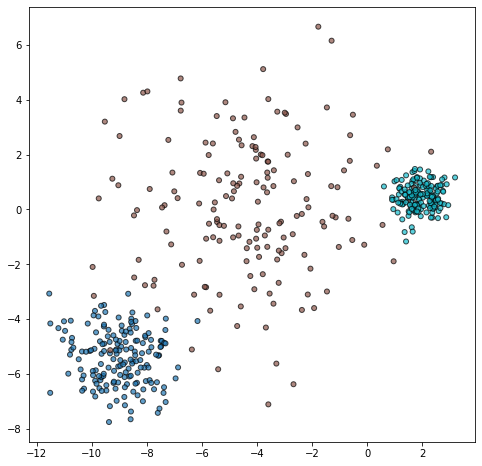

In [16]:
size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

In [17]:
rips_complex = gudhi.RipsComplex(points=X)

In [18]:
simplex_tree = rips_complex.create_simplex_tree(max_dimension=1)
   
print(simplex_tree.num_vertices() , 'vertices')  
print(simplex_tree.num_simplices(), 'simplices')
print('dimension:', simplex_tree.dimension())

500 vertices
125250 simplices
dimension: 1


usetex mode requires TeX.


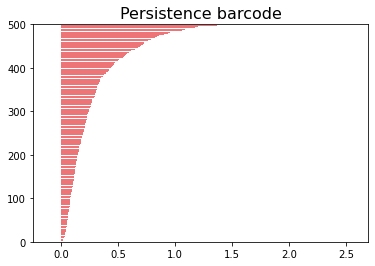

In [19]:
diag = simplex_tree.persistence()
gudhi.plot_persistence_barcode(diag)
plt.show()

In [20]:
#move through list and assign clusters to conected components
point_dict={i:0 for i in range(simplex_tree.num_vertices())}
counter=0
cluster_dict_list = []
distance_list = []
for simplex in simplex_tree.get_filtration():
    if len(simplex[0])>1:
        if all(value > 0 for value in list(point_dict.values())):
            if len(np.unique(np.array(list(point_dict.values())))) == 1:
                print('break')
                print(simplex)
                print(simplex[1])
                simplex_tree.prune_above_filtration(simplex[1])
                break


        #if both points are still in cluster 0, assign both to a new cluster
        if point_dict[simplex[0][0]] == 0 and point_dict[simplex[0][1]] == 0:
            counter += 1
            point_dict[simplex[0][0]] = counter
            point_dict[simplex[0][1]] = counter
            #if one point is in cluster 0 and one is not, assign the one in cluster 0 to the existing cluster
        elif point_dict[simplex[0][0]] == 0 and point_dict[simplex[0][1]] != 0:
            point_dict[simplex[0][0]] = point_dict[simplex[0][1]]

            #and vice versa
        elif point_dict[simplex[0][0]] != 0 and point_dict[simplex[0][1]] == 0:
            point_dict[simplex[0][1]] = point_dict[simplex[0][0]]

            #if both points are not in cluster 0 and not in the same cluster, merge clusters to the lower number cluster
        elif point_dict[simplex[0][0]] != 0 and point_dict[simplex[0][1]] != 0 and point_dict[simplex[0][0]] != point_dict[simplex[0][1]]:
            larger_cluster_number = max(point_dict[simplex[0][0]], point_dict[simplex[0][1]])
            smaller_cluster_number = min(point_dict[simplex[0][0]], point_dict[simplex[0][1]])
            for key, value in point_dict.items():
                if value == larger_cluster_number:
                    point_dict[key] = smaller_cluster_number
                    
        distance_list.append(simplex[1])
        cluster_dict_list.append(point_dict.copy())

break
([53, 183], 2.443661750459049)
2.443661750459049


In [21]:
max(distance_list)

2.443415173621391

In [22]:
len(distance_list)

29038

In [23]:
distance_array = np.array(distance_list)
print(len(distance_array))
distance_array.dtype

29038


dtype('float64')

In [24]:
length = len(cluster_dict_list)
length

29038

In [25]:
print(simplex_tree.num_simplices(), 'simplices')
#?

29539 simplices


In [26]:
#check that all clusters have merged
len(np.unique(np.array(list(point_dict.values()))))

1

In [27]:
print(cluster_dict_list[-2].values()) #penultimate clustering has 2 clusters
print(cluster_dict_list[-1].values()) #last clustering finally merges to all one cluster

dict_values([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [28]:
#find the gaps between birth/death pairs
gaps = np.diff(distance_array)
gaps.shape

(29037,)

In [29]:
#add a zero back to the beginning of the gaps
gaps = np.concatenate([np.zeros(1),gaps])

In [30]:
#find normalized distance
scaler = MinMaxScaler()
normed_distance = scaler.fit_transform(distance_array.reshape(-1,1)).T.reshape(length)

In [31]:
#then invert them and multiply by the gaps to weight early connections in the filtration
inverted_normed_distance = 1 - normed_distance
inverted_normed_distance

array([1.00000000e+00, 9.99923957e-01, 9.94156130e-01, ...,
       7.71224642e-05, 6.48269403e-05, 0.00000000e+00])

In [32]:
#and square it twice to increase the weighting
inverted_normed_distance = np.square(inverted_normed_distance)

In [33]:
inverted_normed_distance

array([1.00000000e+00, 9.99847920e-01, 9.88346411e-01, ...,
       5.94787448e-09, 4.20253218e-09, 0.00000000e+00])

In [34]:
normed_gaps = np.multiply(gaps, inverted_normed_distance)
normed_gaps

array([0.00000000e+00, 1.85516565e-04, 1.39094815e-02, ...,
       1.06316043e-12, 1.26080408e-13, 0.00000000e+00])

In [35]:
#normalize to create a probability vector
gap_vector = normed_gaps / np.sum(normed_gaps)

In [36]:
#check
np.sum(gap_vector)

0.9999999999999999

In [37]:
gap_vector

array([0.00000000e+00, 2.28149949e-04, 1.71060062e-02, ...,
       1.30748431e-12, 1.55054826e-13, 0.00000000e+00])

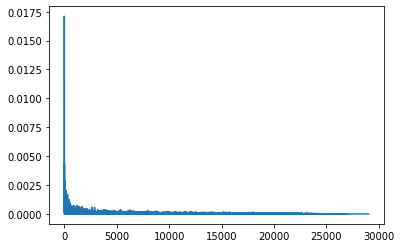

In [38]:
plt.plot(gap_vector)

In [39]:
marker = 0
for i in range(1,length-1):
    if cluster_dict_list[marker] == cluster_dict_list[i]:

        gap_vector[marker] += gap_vector[i]
        gap_vector[i] = 0
        #print(marker)


    else:
        marker = i

1.0


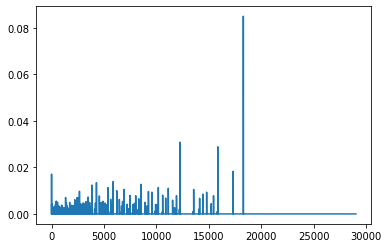

In [40]:
print(np.sum(gap_vector))
plt.plot(gap_vector)

In [41]:
candidates = np.flip(np.argsort(gap_vector))

In [42]:
counter = 0
idx = candidates[counter]
idx
if idx < simplex_tree.num_vertices():
    counter += 1
    print(counter)
    idx = candidates[counter]
    print(idx)

In [43]:
pred = np.array(list(cluster_dict_list[idx].values()))

In [44]:
gap_vector[candidates[0]]

0.08503493108697725

In [45]:
print(gap_vector[idx])
print('percent confidence')
'{:.1%}'.format(gap_vector[idx])

0.08503493108697725
percent confidence


'8.5%'

In [46]:
np.array(list(cluster_dict_list[idx].values()))

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   

In [47]:
#cluster_idx_array = (np.unique(np.array(list(cluster_dict_list[idx].values()))))
#print(cluster_idx_array)
#print(np.count_nonzero(cluster_idx_array))

number_of_clusters = np.count_nonzero(np.unique(np.array(list(cluster_dict_list[idx].values()))))
print(number_of_clusters)
print('your dataset appears to have', number_of_clusters,'clusters, not including any outliers')
#return counts from np.unique? to filter out small clusters?

2
your dataset appears to have 2 clusters, not including any outliers


In [48]:
true = y

print(metrics.adjusted_rand_score(true, pred))
print(metrics.silhouette_score(X, pred, metric="sqeuclidean"))

1.6193094165798327e-05
0.14176283648780458


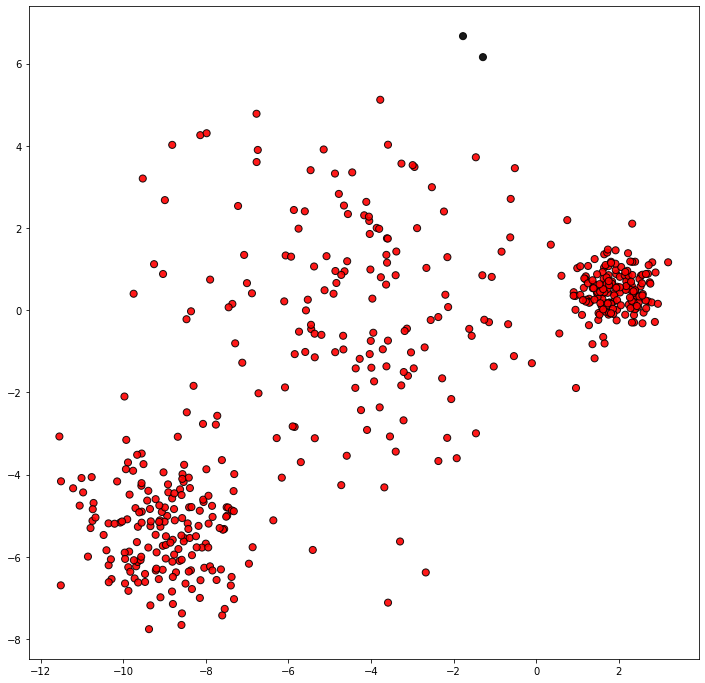

In [49]:
size=12
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=50, 
            c=np.array(list(cluster_dict_list[idx].values())),
            marker="o",
            cmap='flag',
            norm=None,
            alpha=.9,
            edgecolor="k")

In [50]:
idx_list = candidates[:100]
idx_list

array([18297, 12260, 15860, 17325,     2,  5883,  4283,  8546,  3849,
       10186,  5369, 11139,  6926, 13559,  6221,  2662,  9244, 14797,
        9570, 14427, 10601,  7493, 11921, 15453,  8029,  4560,  3485,
        1340,  2443,  2544, 10889, 14127,  8327,  5643,  6470,  2213,
       11548,   450,  4915,  6775,  3274,   571,  8929,  1729,  4718,
        3635,  1414,  5118,  4190,  3063,  7910,  2982, 15236,    12,
        2802,  7210,  5793,  9928,  2383,  3208,  5253,   375, 10055,
        7745,  3147,   966,  1921,  2104,     7,  9130,  1467,  2906,
         710,  6681,  1006,   271,  4818,  3777,   813,    50,  3380,
         150,  2351,  2872, 11733,  3433,  1149,  2166,  1299,    76,
         104,   306,    13,  1820,  1553,    30,  1036,   238,   777,
          89])

In [51]:
idx_list.sort()

In [52]:
idx_list = [x for x in idx_list if x < idx+1]

In [53]:
idx_array = np.asarray(idx_list)
idx_array

array([    2,     7,    12,    13,    30,    50,    76,    89,   104,
         150,   238,   271,   306,   375,   450,   571,   710,   777,
         813,   966,  1006,  1036,  1149,  1299,  1340,  1414,  1467,
        1553,  1729,  1820,  1921,  2104,  2166,  2213,  2351,  2383,
        2443,  2544,  2662,  2802,  2872,  2906,  2982,  3063,  3147,
        3208,  3274,  3380,  3433,  3485,  3635,  3777,  3849,  4190,
        4283,  4560,  4718,  4818,  4915,  5118,  5253,  5369,  5643,
        5793,  5883,  6221,  6470,  6681,  6775,  6926,  7210,  7493,
        7745,  7910,  8029,  8327,  8546,  8929,  9130,  9244,  9570,
        9928, 10055, 10186, 10601, 10889, 11139, 11548, 11733, 11921,
       12260, 13559, 14127, 14427, 14797, 15236, 15453, 15860, 17325,
       18297])

In [54]:
silhouette_list = []
for i in idx_list:
    
    silhouette = metrics.silhouette_score(X, np.array(list(cluster_dict_list[i].values())), metric="euclidean")
    silhouette_list.append(silhouette)

In [55]:
silhouette_array = np.asarray(silhouette_list)

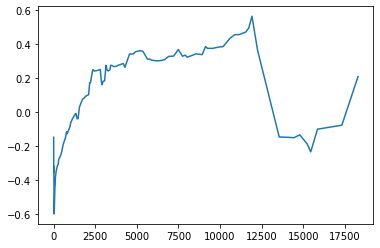

In [56]:
plt.plot(idx_array,silhouette_array)

In [57]:
idx = idx_array[silhouette_array.argmax()]
idx

11921

In [58]:
pred = np.array(list(cluster_dict_list[idx].values()))
rand_score = metrics.adjusted_rand_score( true, pred)
rand_score

0.8436797837776414

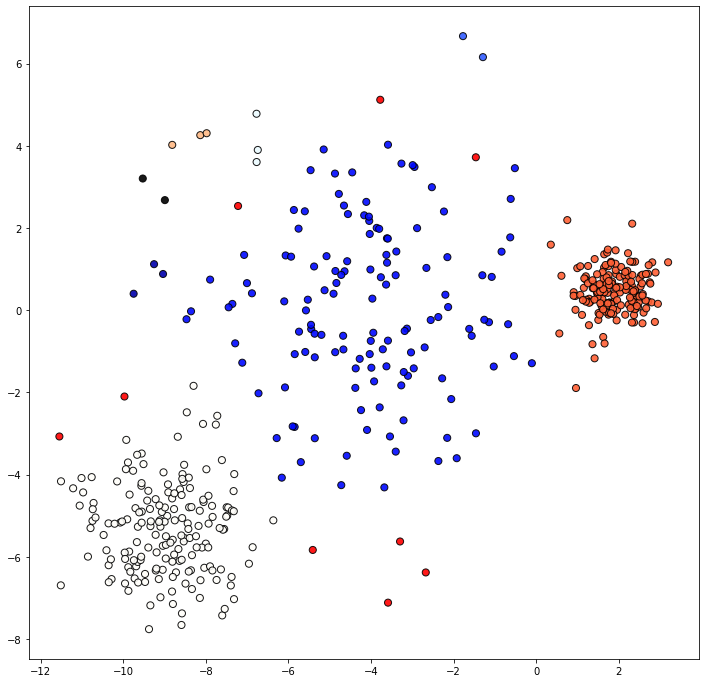

In [59]:
size=12
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=50, 
            c=pred,
            marker="o",
            cmap=cmap,
            norm=None,
            alpha=.9,
            edgecolor="k")

plt.show()

In [60]:
new_scaler = np.arange(len(gap_vector))
scaler = MinMaxScaler()
new_scaler = scaler.fit_transform(new_scaler.reshape(-1,1))
new_scaler = 1 - new_scaler
new_scaler = np.square(np.square(new_scaler))
new_scaler = new_scaler.reshape(len(gap_vector))

In [61]:
inverted_normed_silhouette_array = np.multiply(silhouette_array,new_scaler[idx_array])

In [62]:
inverted_normed_silhouette_array

array([-0.14761872, -0.35724308, -0.32399845, -0.31679204, -0.5968123 ,
       -0.53319892, -0.43819653, -0.4237315 , -0.38119915, -0.34103789,
       -0.30143764, -0.29725043, -0.26627577, -0.25119101, -0.2326007 ,
       -0.17634885, -0.13639107, -0.10339766, -0.11298095, -0.07908334,
       -0.06334928, -0.05104576, -0.03083225, -0.00912805, -0.00610951,
       -0.03221654, -0.03045758,  0.02474043,  0.05893614,  0.0636413 ,
        0.07133243,  0.07635583,  0.12701489,  0.12670341,  0.17846391,
        0.17736104,  0.17065772,  0.16926127,  0.16817477,  0.16757333,
        0.11727116,  0.10603777,  0.11890995,  0.11788654,  0.17478887,
        0.15633169,  0.15059856,  0.15215783,  0.16728547,  0.1654057 ,
        0.15710513,  0.15517882,  0.15590426,  0.15391695,  0.13947164,
        0.17305997,  0.16852747,  0.16706836,  0.16955646,  0.1662748 ,
        0.16272099,  0.15826972,  0.1315719 ,  0.12837602,  0.12393429,
        0.11520236,  0.11113037,  0.10914323,  0.11022781,  0.11

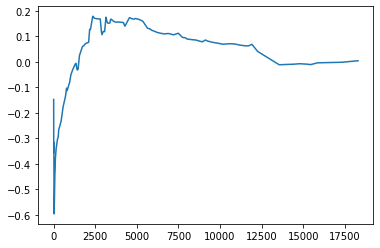

In [63]:
plt.plot(idx_array,inverted_normed_silhouette_array)

In [64]:
idx = idx_array[inverted_normed_silhouette_array.argmax()]
idx

2351

In [65]:
pred = np.array(list(cluster_dict_list[idx].values()))
rand_score = metrics.adjusted_rand_score( true, pred)
rand_score

0.7033728622651689

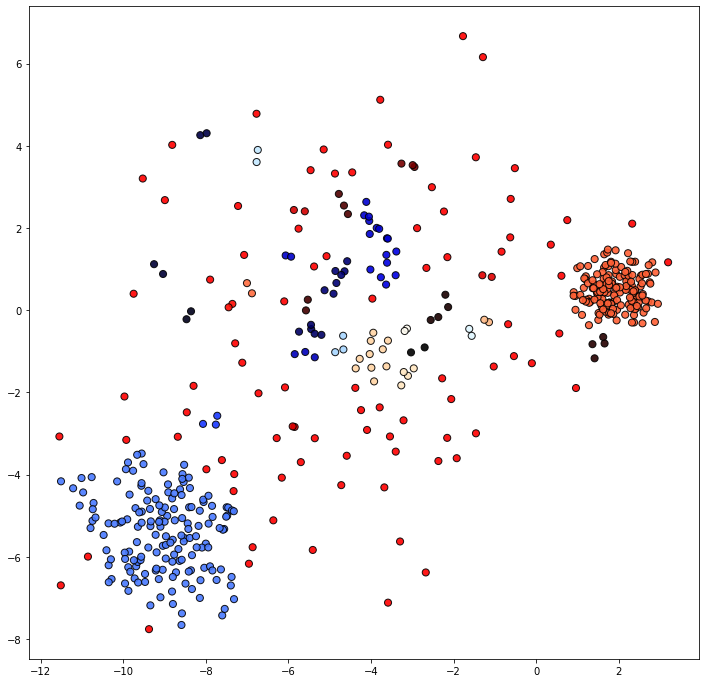

In [66]:
size=12
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=50, 
            c=pred,
            marker="o",
            cmap=cmap,
            norm=None,
            alpha=.9,
            edgecolor="k")

plt.show()

In [67]:
rand_score = metrics.adjusted_rand_score( true, pred)
rand_score

0.7033728622651689

In [68]:
masked = np.ma.masked_where(pred == 0,pred)
masked

masked_array(data=[1, 1, 80, 1, 12, 121, 1, --, 12, 12, --, 12, 1, 12, --,
                   1, 5, 1, 1, 111, 1, 116, 12, 109, 109, 5, 1, --, 125,
                   1, 12, 1, 1, --, 60, 12, --, --, --, 12, --, --, 1, 12,
                   12, 1, 12, 1, 1, 1, 1, 5, 12, 104, 1, 12, 1, 1, 12, 1,
                   12, 1, 1, 49, --, 12, 1, 1, 109, 131, --, 12, 1, 12,
                   98, --, 1, 1, 109, 1, 12, 114, 1, --, 1, 1, 1, 1, 1,
                   --, 12, --, 12, 12, 12, 102, 12, 12, 12, --, --, 1, 1,
                   98, 1, 12, 1, --, 80, --, 125, 1, 1, 1, 123, 12, 1, --,
                   12, 12, 12, 97, --, 104, 12, 12, 83, 1, 1, --, --, 106,
                   1, --, 1, 12, 12, 1, 12, 1, 49, 1, 12, 104, 121, --, 1,
                   --, 12, --, 1, 111, 12, 12, 1, 12, 12, 12, 1, 1, --,
                   12, 72, 12, 1, 1, 12, --, 98, 12, 112, 1, --, 1, 1, 12,
                   --, 12, 1, 80, 12, 12, 1, 124, 93, 88, --, --, 1, 12,
                   --, --, 12, --, 12, 1

In [69]:
#cluster_idx_array = (np.unique(np.array(list(cluster_dict_list[idx].values()))))
#print(cluster_idx_array)
#print(np.count_nonzero(cluster_idx_array))

number_of_clusters = np.count_nonzero(np.unique(np.array(list(cluster_dict_list[idx].values()))))
print(number_of_clusters)
print('your dataset appears to have', number_of_clusters,'clusters, not including any outliers')
#return counts from np.unique? to filter out small clusters?

30
your dataset appears to have 30 clusters, not including any outliers


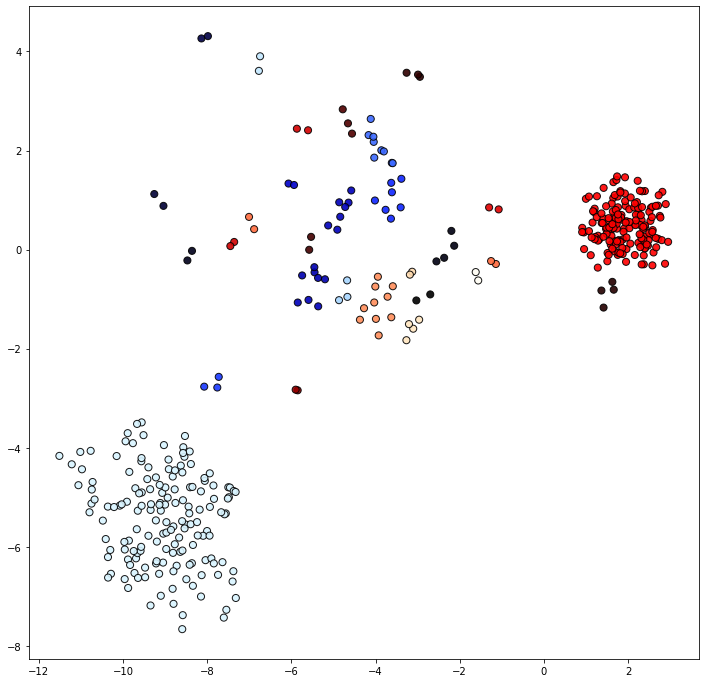

In [70]:
size=12
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=50, 
            c=masked,
            marker="o",
            cmap=cmap,
            norm=None,
            alpha=.9,
            edgecolor="k")

plt.show()

In [71]:
def get_first_max(array):
    for i in range(len(array)):
        if idx_array[i] > 2*simplex_tree.num_vertices():

            if array[i] > array[i+1]:
                if array[i] > array[i+2]:

                    return float(array[i])

In [72]:
first_max = get_first_max(silhouette_array)
idx_array[np.where(silhouette_array == first_max)]

array([1340])

In [73]:
idx = int(idx_array[np.where(silhouette_array == first_max)])
idx

1340

In [74]:
pred = np.array(list(cluster_dict_list[idx].values()))
rand_score = metrics.adjusted_rand_score( true, pred)
rand_score

0.4894681057348774

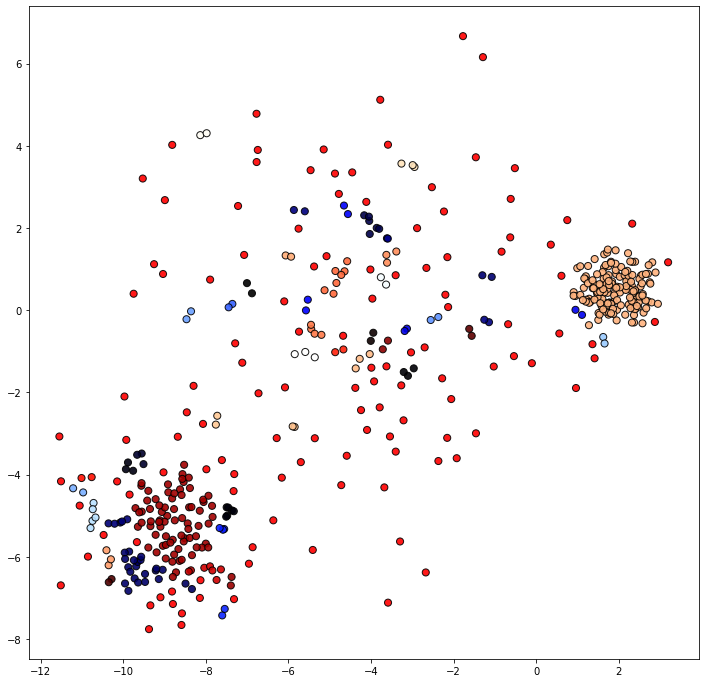

In [75]:
size=12
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=50, 
            c=pred,
            marker="o",
            cmap=cmap,
            norm=None,
            alpha=.9,
            edgecolor="k")

plt.show()

In [76]:
rand_score_list = []
true = y
for i in idx_list:
    pred = np.array(list(cluster_dict_list[i].values()))
    rand_score = metrics.adjusted_rand_score( true, pred)
    rand_score_list.append(rand_score)

In [77]:
rand_score_array = np.asarray(rand_score_list)

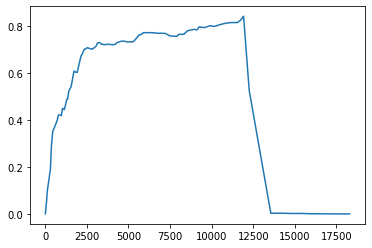

In [78]:
 plt.plot(idx_array,rand_score_array)

In [79]:
max(rand_score_array)

0.8436797837776414

In [80]:
idx = idx_array[rand_score_array.argmax()]
idx

11921

In [81]:
pred = np.array(list(cluster_dict_list[idx].values()))
rand_score = metrics.adjusted_rand_score( true, pred)
rand_score

0.8436797837776414

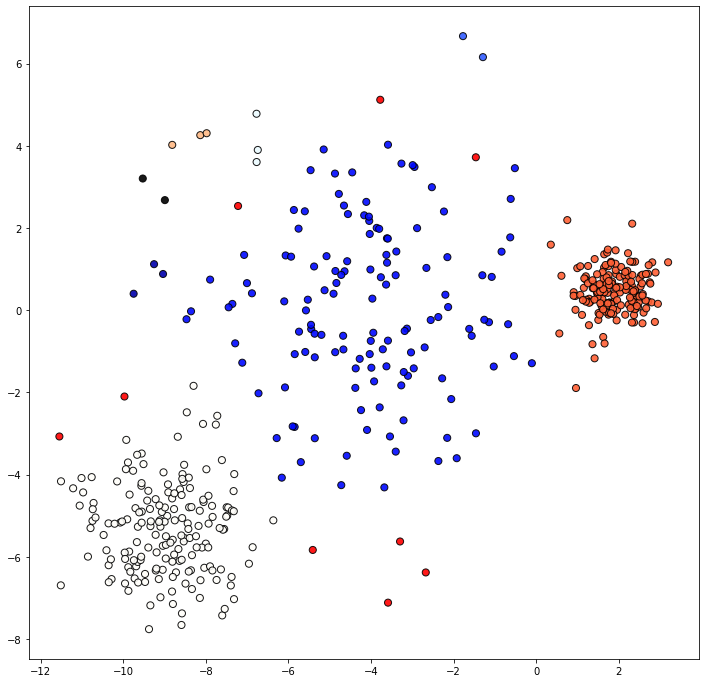

In [82]:
size=12
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=50, 
            c=pred,
            marker="o",
            cmap=cmap,
            norm=None,
            alpha=.9,
            edgecolor="k")

plt.show()

<ipython-input-83-7129a428d4bf>:51: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


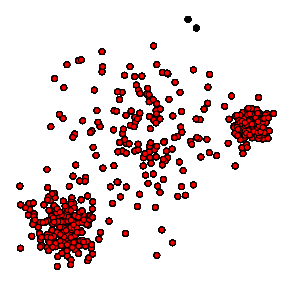

In [83]:
fig, ax = plt.subplots(figsize=(5,5))
frames = len(idx_array)
ax.set_axis_off()

outfile = filename + str(frames) + 'frames.gif'

if not os.path.isfile(outfile):
    def init():
        scatter = ax.scatter(X[:, 0], X[:, 1],
                        s=30, 
                        c=np.array(list(cluster_dict_list[0].values())),
                        marker="o",
                        cmap=cmap,
                        norm=None,
                        alpha=1,
                        edgecolor="k")
        #ax.set(xlim=(-1, 35), ylim=(-1, 35))

        return scatter,

    #collection = PatchCollection(X, animated=True)

    #ax.add_collection(collection)
    #ax.autoscale_view(True)

    def animate(i):

        scatter = ax.scatter(X[:, 0], X[:, 1],
                    s=30, 
                    c=np.array(list(cluster_dict_list[idx_array[i]].values())),
                    marker="o",
                    cmap=cmap,
                    norm=None,
                    alpha=1,
                    edgecolor="k")
        return scatter,



    ani = FuncAnimation(fig, animate,interval=180,init_func=init,frames=frames,repeat=False, blit=True)

    #ani.save('animation.gif')



    #writer=animation.PillowWriter()

    #writer = animation.FFMpegWriter(fps=2,bitrate=1000)

    ani.save(outfile,dpi=300)
    fig.show()


def pogo(dataset):
    rips_complex = gudhi.RipsComplex(points=dataset,max_edge_length=100)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=1)
    df = pd.DataFrame(simplex_tree.get_filtration(), columns=['simplex','distance'])
    #move through list and assign clusters to conected components

    point_dict={i:0 for i in range(simplex_tree.num_vertices())}
    counter=0

    cluster_dict_list = []
    for i in range(simplex_tree.num_vertices(),len(df)):
        #if both points are still in cluster 0, assign both to a new cluster
        if point_dict[df.loc[i,'simplex'][0]] == 0 and point_dict[df.loc[i,'simplex'][1]] == 0:
            counter += 1
            point_dict[df.loc[i,'simplex'][0]] = counter
            point_dict[df.loc[i,'simplex'][1]] = counter
            #if one point is in cluster 0 and one is not, assign the one in cluster 0 to the existing cluster
        elif point_dict[df.loc[i,'simplex'][0]] == 0 and point_dict[df.loc[i,'simplex'][1]] != 0:
            point_dict[df.loc[i,'simplex'][0]] = point_dict[df.loc[i,'simplex'][1]]

            #and vice versa
        elif point_dict[df.loc[i,'simplex'][0]] != 0 and point_dict[df.loc[i,'simplex'][1]] == 0:
            point_dict[df.loc[i,'simplex'][1]] = point_dict[df.loc[i,'simplex'][0]]

            #if both points are not in cluster 0 and not in the same cluster, merge clusters to the lower number cluster
        elif point_dict[df.loc[i,'simplex'][0]] != 0 and point_dict[df.loc[i,'simplex'][1]] != 0 and point_dict[df.loc[i,'simplex'][0]] != point_dict[df.loc[i,'simplex'][1]]:
            larger_cluster_number = max(point_dict[df.loc[i,'simplex'][0]], point_dict[df.loc[i,'simplex'][1]])
            smaller_cluster_number = min(point_dict[df.loc[i,'simplex'][0]], point_dict[df.loc[i,'simplex'][1]])
            for key, value in point_dict.items():
                if value == larger_cluster_number:
                    point_dict[key] = smaller_cluster_number
        cluster_dict_list.append(point_dict.copy())
        #print(point_dict)
        #print('step',i)

    
    cutoff_value = 0
    for i in range(len(cluster_dict_list)):
        if cutoff_value == 0:
            if all(value != 0 for value in cluster_dict_list[i].values()):
                cutoff_value = i
                print('dataset becomes connected at simplex #',cutoff_value)
       
    df = df[:cutoff_value]
    #cluster_dict_list =
    
    #find the gaps between birth/death pairs

    df['gaps'] = df['distance'] - df['distance'].shift(1)
    
    #find normalized distance
    scaler = MinMaxScaler()
    df['normed_distance'] = scaler.fit_transform(df['distance'].values.reshape(-1, 1))

    #Mulitply the gaps by their normed location in the filtration, weighting features more heavily if they're later
    df['normed_gaps'] = df['gaps'] * df['normed_distance']

    norm_sum = df['normed_gaps'].sum()
    df['probability_vector_normed_gaps'] = df['normed_gaps'] / norm_sum
    
    gap_sum = df['gaps'].sum()
    df['probability_vector_gaps'] = df['normed_gaps'] / gap_sum

    partition = 10
    candidates = [i for i in df.nlargest(partition ,['gaps']).index if i in df.nlargest( partition,['normed_gaps']).index]
    #print('possible cuttoffs' , candidates)
    idx = cutoff_value - 1
    #idx = candidates[0]
    print('idx' ,idx)

    print('your dataset appears to have', len(np.unique(np.array(list(cluster_dict_list[idx].values())))),'clusters')

    #print( np.array(list(cluster_dict_list[idx].values())))

    print(simplex_tree.num_vertices() , 'vertices')  
    print(simplex_tree.num_simplices(), 'simplices')
    print('dimension:', simplex_tree.dimension())

    size=10
    plt.figure(figsize=(size,size))
    plt.scatter(dataset[:, 0], dataset[:, 1],
                s=30, 
                c=np.array(list(cluster_dict_list[idx].values())),
                marker="o",
                cmap='rainbow',
                norm=None,
                alpha=.9,
                edgecolor="k")
    
    return cluster_dict_list, candidates, idx


cluster_dict_list, candidates, idx = pogo(X)

true = y
pred = np.array(list(cluster_dict_list[idx].values()))

print('adjusted rand score =' , metrics.adjusted_rand_score(true, pred))
